In [1]:
%load_ext noworkflow
import noworkflow.now.ipython as nip
nip.init("..")
from noworkflow.now.persistence.models.graphs.dependency_graph import variable_id

<!DOCTYPE html>
 
 
 
 </body

<!DOCTYPE html>
 
 
 
 </body

In [2]:
trial = nip.Trial()
trial.dependency_config.mode = "simulation"
trial.dependency_config.rank_line = False

In [3]:
%%now_prolog --result result {trial.id}
var_name({trial.id}, X, 'run/data/DRT240/DRT240_11000eV_002.img'), slice({trial.id}, X, Y)

In [4]:
trial.dependency_filter.run()

In [5]:
dfilter = trial.dependency_filter
filtered_variables = []
for values in result:
    for dependency in values["Y"]:
        if isinstance(dependency, int):
            filtered_variables.append(variable_id(dfilter.variables[dependency]))
        else:
            filtered_variables.append("a_" + dependency.value[1:])
  

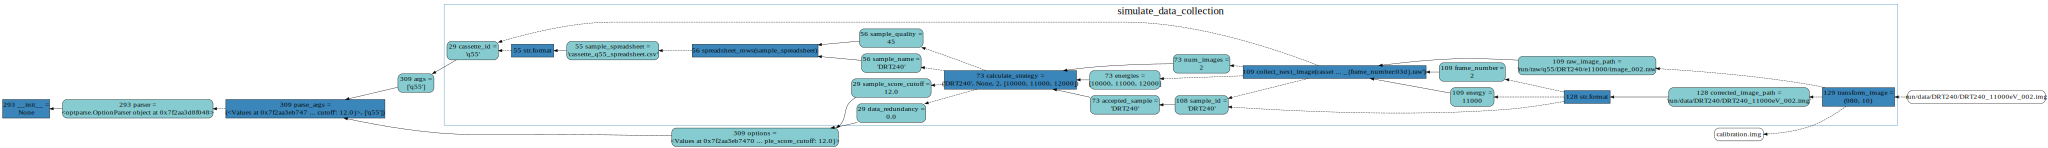

In [6]:
dfilter.filtered_variables = filtered_variables
trial.dot.format = "svg"
trial.dot.run = False
trial.dot.value_length = 55
trial.dot

In [7]:
result = trial.dot.export_text()
open('graph_query.dot', 'w').write(result)

5764

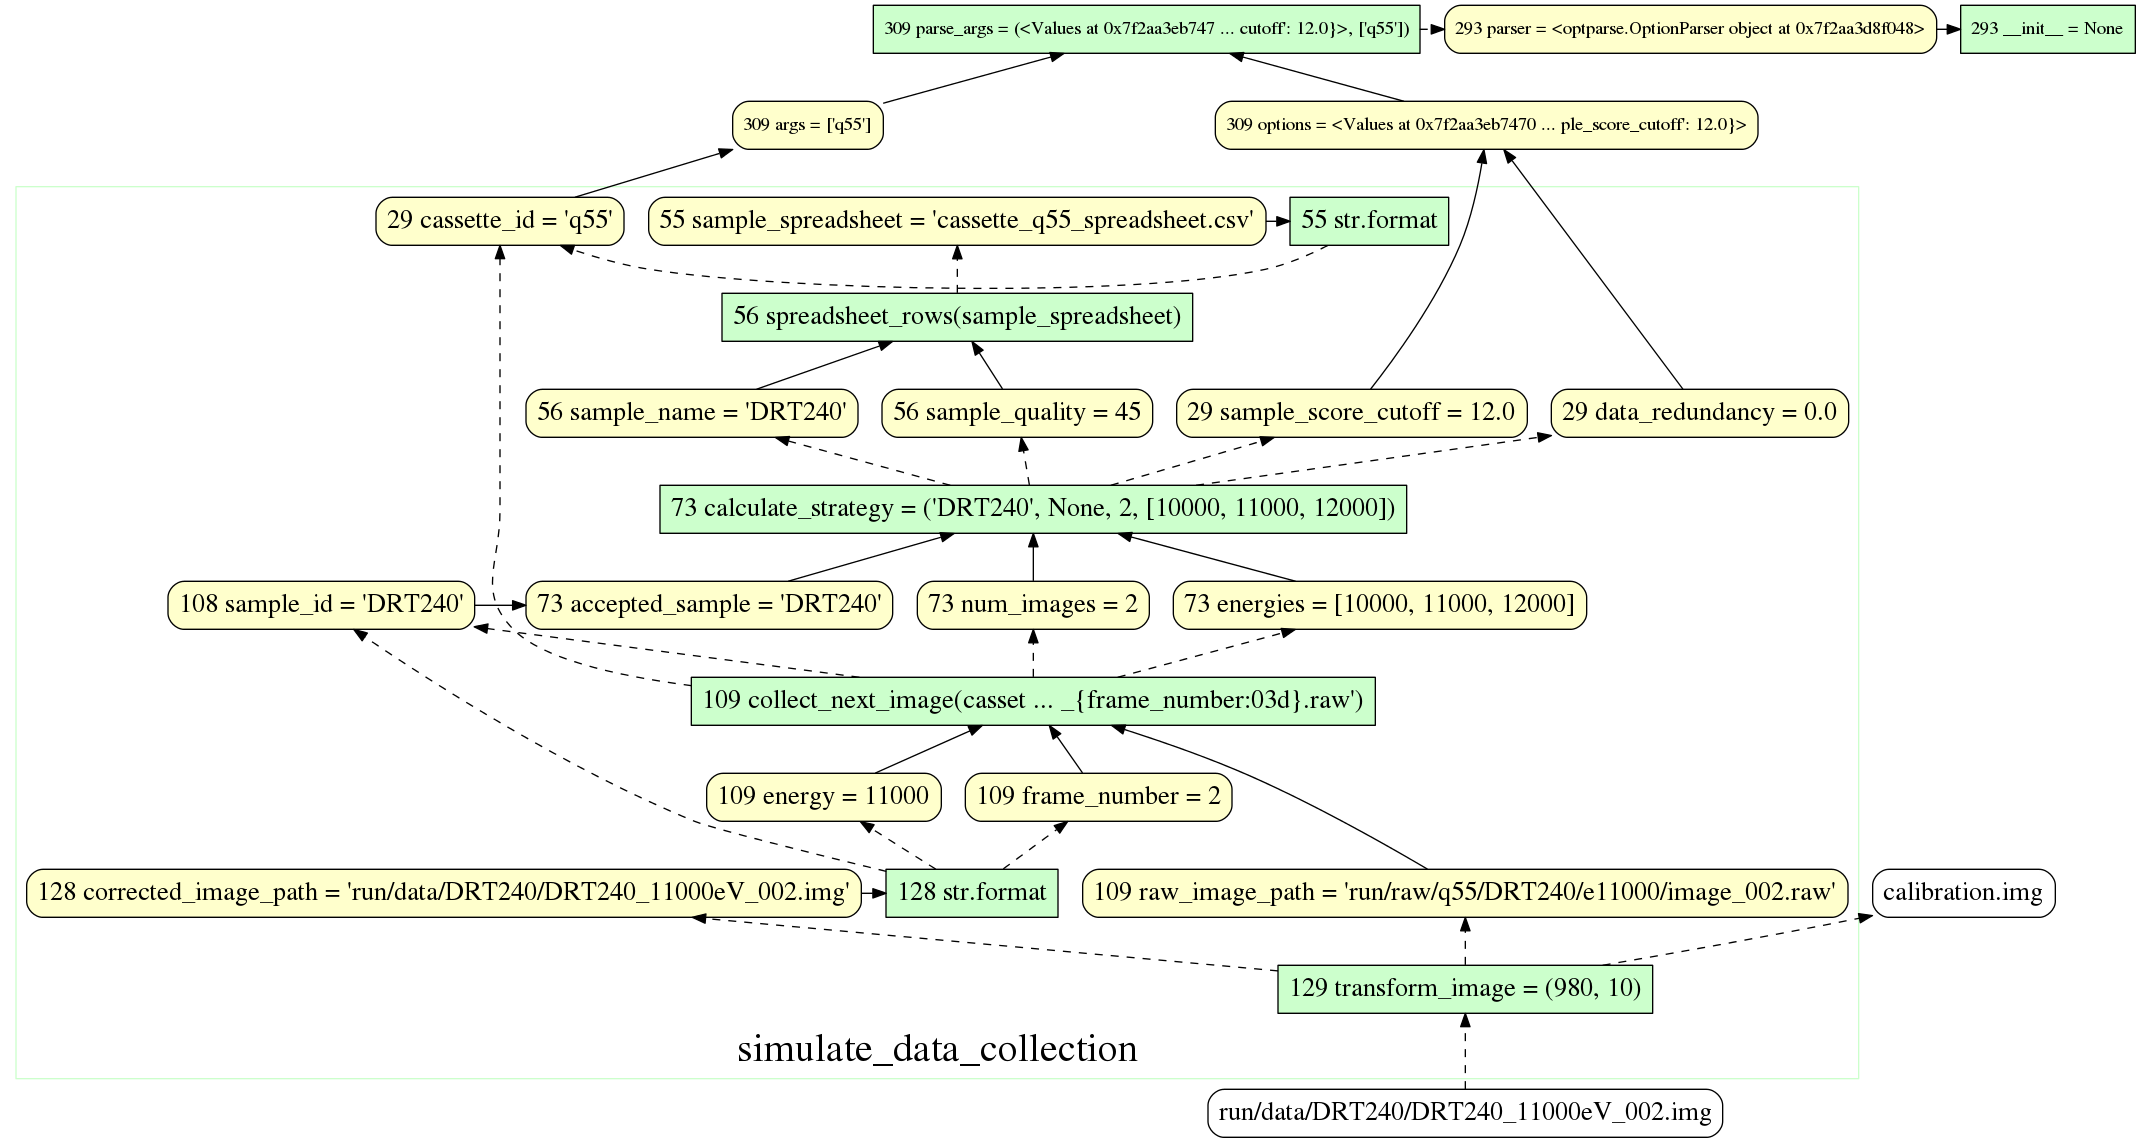

In [9]:
from collections import defaultdict
var = defaultdict(dict)
for id, v in trial.dependency_filter.variables.items():
    v = trial.dependency_filter.synonyms.get(v, v)
    if variable_id(v) in filtered_variables:
        var[v.line][v.name] = v

activation_id = var[109]["energy"].activation_id
        
new_result = (
    result
    .replace("rankdir=RL", "rankdir=BT") # Vertical
    .replace("=\n", "= ") # Result on same line
    # Add ranks
    .replace(
        "digraph dependency {",
        "digraph dependency {\n"
        "    {rank=same %s}\n"
        "    {rank=same %s}\n" % (
            " ".join(map(variable_id, [var[309]['options'], var[309]['args']])),
            " ".join(map(variable_id, [var[293]['__init__'], var[293]['parser'], var[309]['parse_args']])),
        )
    )
    .replace(
        "    subgraph cluster_%s  {" % (activation_id,), 
        "    subgraph cluster_%s  {\n"
        "        {rank=same %s}\n"
        "        {rank=same %s}\n"
        "        {rank=same %s}\n"
        "        {rank=same %s}\n" 
        "" % (
            activation_id,
            " ".join(map(variable_id, [var[73]["energies"], var[73]["num_images"], var[108]["sample_id"], var[73]["accepted_sample"]])),
            " ".join(map(variable_id, [var[29]["cassette_id"], var[55]["str.format"], var[55]["sample_spreadsheet"]])),
            " ".join(map(variable_id, [var[128]["str.format"], var[128]["corrected_image_path"], var[109]["raw_image_path"]])),
            " ".join(map(variable_id, [var[109]["energy"], var[109]["frame_number"]])),
        )
    )
    .replace(
        "#3A85B9",
        "#CCFFCC"
    )
    .replace(
        "#85CBD0",
        "#FFFFCC"
    )
)
get_ipython().run_cell_magic("dot", "--format png", new_result)

In [10]:
open('graph_query2.dot', 'w').write(new_result)

6020